# Linear Regression with Gradient Descent
## Dataset: Diabetes dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset as a pandas dataframe from sklearn datasets
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True, scaled=False)
df = diabetes.data
df['target'] = diabetes.target

# Create Y and X variables
Y = df['target']
X = df.drop(['target'], axis=1)
X['intercept'] = 1

# OLSEstimator
beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
Y_hat = np.dot(X, beta)
Y_hat_ols = Y_hat

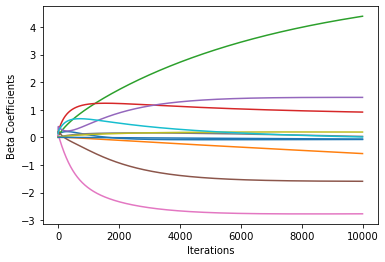

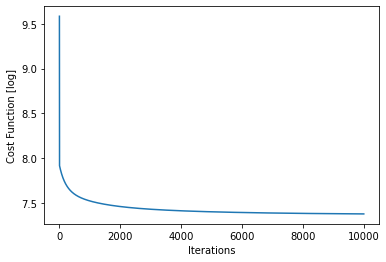

In [2]:
# Function to minimize the cost function
def gradient_descent(X, Y, beta, alpha, iterations):
    m = len(Y)
    cost_history = np.zeros(iterations)
    beta_history = np.zeros((iterations, len(beta)))
    for it in range(iterations):
        # Step 1: Calculate the predicted target variable
        Y_hat = np.dot(X, beta)
        # Step 2: Calculate the residuals
        residuals = Y_hat - Y
        # Step 3: Calculate the gradient
        gradient = np.dot(X.T, residuals) / m
        # Step 4: Update the beta coefficients
        beta = beta - alpha * gradient
        # Step 5: Update the cost function
        cost = np.sum((residuals ** 2)) / (2 * m)
        cost_history[it] = cost
        beta_history[it] = beta
        # if there is an error, troght an exception
        if np.isnan(beta).any():
            raise Exception("The learning rate is too high. Reduce the learning rate and try again.")
    return beta, cost_history, beta_history

# Initialize the beta coefficients
beta = np.zeros(X.shape[1])

# Set the learning rate
alpha = 0.00001

# Set the number of iterations
iterations = 10000

# Run the gradient descent function
beta, cost_history, beta_history = gradient_descent(X, Y, beta, alpha, iterations)

# plot beta history
plt.plot(beta_history)
plt.xlabel('Iterations')
plt.ylabel('Beta Coefficients')
plt.show()

# plot cost history logaritmic
plt.plot(np.log(cost_history))
plt.xlabel('Iterations')
plt.ylabel('Cost Function [log]')
plt.show()


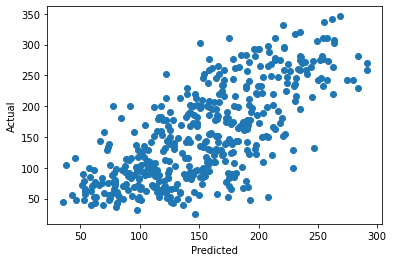

In [3]:
# plot Y_hat vs Y
plt.scatter(Y_hat, Y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

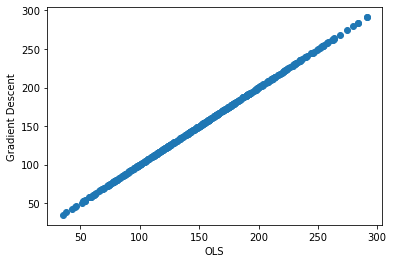

In [4]:
# Compare OLS vs Gradient Descent
plt.scatter(Y_hat_ols, Y_hat)
plt.xlabel('OLS')
plt.ylabel('Gradient Descent')
plt.show()